In [ ]:
# Funktion för att läsa in och städa upp datan (källhänvisning: chatgpt, youtube, w3schools ) 
def clean_data(textfile_path):
    # Skapar ny lista för att lagra den städade datan
    cleaned_data = []
    with open(textfile_path, "r") as file:
        # Hoppa över första raden
        next(file)
        # Läs in resterande rader och dela de vid ,
        for line in file:
            # Dela upp raden vid kommatecknet och ta bort paranteserna
            measures = line.strip("()\n").split(", ")
            # Konvertera varje mått från sträng till float och avrunda till fyra decimaler
            measures_round = [round(float(m), 4) for m in measures]               
            # Formaterar måtten som en sträng med paranteser runt dem
            updated_measures = f"({measures_round[0]:.4f}, {measures_round[1]:.4f})"
            # Lägg till de uppdaterade måtten i den rena datan
            cleaned_data.append((updated_measures))
        return cleaned_data
        
pikachu_data = clean_data("pikachu.txt")
pichu_data = clean_data("pichu.txt")


In [34]:
# Funktion som skriver den rena datan till en ny fil 
def data_to_file(data, file_path):
    with open(file_path, "w") as file:
            for row in data:
                # Dela upp raden vid kommatecknet och ta bort paranteserna
                cleaned_row = row.strip("()").split(", ")
                # Skriv till fil 
                file.write(f"{cleaned_row[0]}, {cleaned_row[1]}\n")

data_to_file(pikachu_data, "pikachu_cleaned.txt")
data_to_file(pichu_data, "pichu_cleaned.txt")

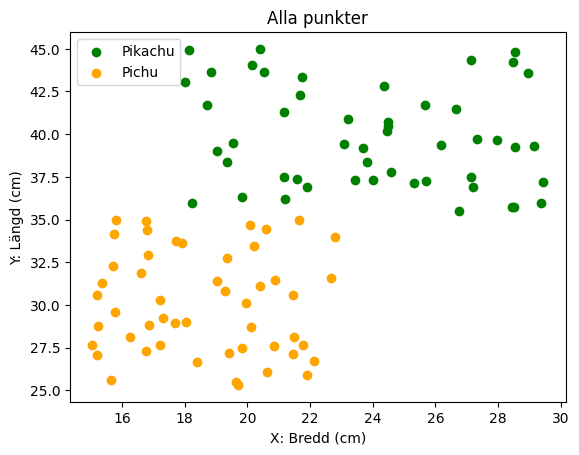

In [41]:
import matplotlib.pyplot as plt 
import numpy as np 

# Funktion för att läsa in filen 
def read_file(file_path):
    data = np.loadtxt(file_path, delimiter=",")
    return data

# Läs in datan från filerna 
pikachu_data = read_file("pikachu_cleaned.txt")
pichu_data = read_file("pichu_cleaned.txt")

# Funktion för att plotta punkterna 
def plot_points(data, color, label):
    x = data[:, 0]
    y = data[:, 1]
    plt.scatter(x,y, color=color, label=label)

# Plotta punkterna där röd = Pikachu och blå = Pichu
plot_points(pikachu_data, color="green", label="Pikachu")
plot_points(pichu_data, color="orange", label="Pichu")

# Ställ in diagram
plt.title("Alla punkter")
plt.xlabel ("X: Bredd (cm)")
plt.ylabel("Y: Längd (cm)")
plt.legend()

# Visa 
plt.show()